# Darkfield Image Test
Notebook to demonstrate the use of Safas on darkfield images

In [2]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import pickle

import cv2
import numpy as np
from rich import progress
import matplotlib.pyplot as plt

sys.path.append(str(Path().absolute().parents[1])) # add safas to PATH

src = cv2.imread("IMG_7518.JPG")

In [3]:
from safas.labelers.edge_gradient import labeler 

In [4]:
from time import time


In [59]:
# process using two different parameter sets
t0 = time()
params = dict(brightfield=False,
            thresh_val=200,
            apply_grad_filter=True,
            grad_thresh_val=80,
            apply_min_px_filter=True,
            area_min_px=5,
            return_objects=True)

objs = labeler.labeler(src, **params)

print(f"{(time()-t0):0.1f} s")
if objs is not None: 
    N = len(objs)
else: 
    N = None
title_1 = f"{N} objs, thresh_val {params['thresh_val']}, grad_thresh_val {params['grad_thresh_val']}"
print(title_1)
objs


3.7 s
41 objs, thresh_val 200, grad_thresh_val 80


{1: {'obj_idx': 2,
  'track_idx': None,
  'frame_idx': None,
  'obj_area': 57,
  'obj_centroid': array([2881.52631579,  218.84210526]),
  'obj_contour': array([[2882,  213],
         [2881,  214],
         [2881,  215],
         [2880,  216],
         [2880,  217],
         [2879,  218],
         [2879,  220],
         [2878,  221],
         [2878,  223],
         [2879,  224],
         [2880,  223],
         [2881,  223],
         [2882,  222],
         [2883,  222],
         [2885,  220],
         [2885,  218],
         [2884,  217],
         [2884,  215]], dtype=int32),
  'obj_contour_cv': (array([[[2882,  213]],
   
          [[2881,  214]],
   
          [[2881,  215]],
   
          [[2880,  216]],
   
          [[2880,  217]],
   
          [[2879,  218]],
   
          [[2879,  220]],
   
          [[2878,  221]],
   
          [[2878,  223]],
   
          [[2879,  224]],
   
          [[2880,  223]],
   
          [[2881,  223]],
   
          [[2882,  222]],
   
          [[

In [8]:
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src = cv2.GaussianBlur(src, (3, 3), 0)

In [9]:
ret, thresh = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY)

_, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)

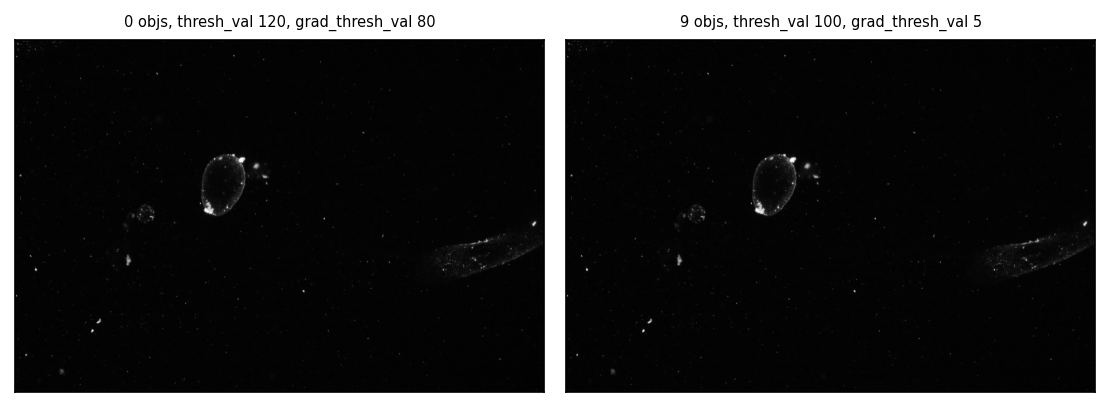

In [15]:
f, ax  = plt.subplots(1,2, dpi=150, figsize=(7.5, 3.5))

for a in ax: 
    a.set_xticks([])
    a.set_yticks([])

def add_cv_contours(out, objs): 
    for obj_idx in list(objs): 
        pts = objs[obj_idx]["obj_contour_cv"] 
        out = cv2.drawContours(out, pts, -1, (0,255,0), 1) 
    return out

out_1 = add_cv_contours(src.copy(), objs_1)
out_2 = add_cv_contours(src.copy(), objs_2)

ax[0].imshow(out_1)
ax[0].set_title(title_1, fontsize=7)
ax[1].imshow(out_2)
ax[1].set_title(title_2, fontsize=7)
plt.tight_layout()

plt.savefig('filter_ex.png', dpi=150, facecolor="w")